# 1-2. Appendix-Simple Linear Regression and Gradient Descent

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In Section 3, we will discuss `np.stack`. We first investigate `for _ in range( )` and `np.random.rand` which are used in Sectino 3.

### 1. `for _ in range( )`

`for _ in range(n)` is used to indicate that the loop counter is not actually used in the loop.

In [2]:
array = [0 for _ in range(5)]
print(array)

[0, 0, 0, 0, 0]


We can replace `_` with other letter, say `i` as follows. 

In [3]:
array = [0 for i in range(5)]
print(array)

[0, 0, 0, 0, 0]


Actually, `i` does not get involved in the loop counter. In this case, it is better to use the underscore.

### 2. `np.random.randn`

`randn` generates an array of shape (d0, d1, ..., dn), filled with random floats sampled from a standard normal distribution of mean 0 and variance 1.

https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html

In [4]:
A = np.random.randn(3, 4)
print(A)
print(type(A))

[[ 0.11443339 -1.21801154  0.86126093  1.08103865]
 [ 0.998459    0.58666568 -0.14705271  1.28300161]
 [-0.86920385 -0.14511392 -1.69392147  1.38912048]]
<class 'numpy.ndarray'>


`np.random.randn(3, 4)` generated a 3 by 4 matrix with floats from the standard normal distribution.
Using `for _ in range( )`, we can generate a 2 by 3 by 4 matrix as follows. However, it will not be an ndarray object. It will be a list.

In [5]:
array = [np.random.randn(3, 4) for _ in range(2)]
array

[array([[ 1.80828579, -1.96804138,  0.02992172, -2.31738879],
        [-0.55231258,  0.63466366, -0.97416135,  2.3102627 ],
        [ 2.14499187,  1.32829859, -0.3368858 ,  0.09944121]]),
 array([[-0.42161554,  0.39483641,  1.81855895,  0.08938907],
        [-0.34520289,  0.03824916,  0.1643649 ,  0.55835464],
        [ 0.78019898,  0.74040078,  0.92728603, -1.91495797]])]

In [6]:
print(type(array))

<class 'list'>


In the next section, we will use `np.stack` to obtain a `ndarray` instead of `list`.

### 3.`np.stack`

`np.stack` joins a sequence of arrays along a new axis.

https://numpy.org/doc/stable/reference/generated/numpy.stack.html

In the following cell, compare c and d.

In [7]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

c = np.stack((a, b)) # axis = 0
d = np.stack((a, b), axis=-1) # axis = 1

print(c) 
print(d)

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


Using `np.stack`, we can convert the list obtained by `for _ in range()` into ndarray.

In [8]:
arrays = [np.random.randn(3, 4) for _ in range(2)]
stack1 = np.stack(arrays, axis=0)
stack1

array([[[-6.13943591e-01, -2.00805529e-01, -6.52261742e-01,
          2.63969829e-03],
        [ 2.97849974e+00,  1.31477236e+00,  6.13076166e-03,
         -9.05554784e-01],
        [-6.57330623e-01,  1.15441796e+00,  1.70602553e+00,
          2.08023210e+00]],

       [[ 1.31265035e-01, -6.09151418e-01, -2.50801659e+00,
         -4.99207470e-01],
        [-2.07127713e-01,  3.58986221e-01,  5.25122982e-01,
         -9.44169017e-01],
        [-1.32778134e-01,  9.75883881e-01,  1.36099041e+00,
         -1.12685745e+00]]])

The type of `stack1` is ndarray and its shape is 2 by 3 by 4.

In [9]:
print(type(stack1))
print(stack1.shape)

<class 'numpy.ndarray'>
(2, 3, 4)


We can also generate a 3 by 2 by 4 or 3 by 4 by 2 ndarray.

In [10]:
stack2 = np.stack(arrays, axis=1)
print(stack2)
print(stack2. shape)

[[[-6.13943591e-01 -2.00805529e-01 -6.52261742e-01  2.63969829e-03]
  [ 1.31265035e-01 -6.09151418e-01 -2.50801659e+00 -4.99207470e-01]]

 [[ 2.97849974e+00  1.31477236e+00  6.13076166e-03 -9.05554784e-01]
  [-2.07127713e-01  3.58986221e-01  5.25122982e-01 -9.44169017e-01]]

 [[-6.57330623e-01  1.15441796e+00  1.70602553e+00  2.08023210e+00]
  [-1.32778134e-01  9.75883881e-01  1.36099041e+00 -1.12685745e+00]]]
(3, 2, 4)


In [11]:
stack3 = np.stack(arrays, axis=2)
print(stack3)
print(stack3. shape)

[[[-6.13943591e-01  1.31265035e-01]
  [-2.00805529e-01 -6.09151418e-01]
  [-6.52261742e-01 -2.50801659e+00]
  [ 2.63969829e-03 -4.99207470e-01]]

 [[ 2.97849974e+00 -2.07127713e-01]
  [ 1.31477236e+00  3.58986221e-01]
  [ 6.13076166e-03  5.25122982e-01]
  [-9.05554784e-01 -9.44169017e-01]]

 [[-6.57330623e-01 -1.32778134e-01]
  [ 1.15441796e+00  9.75883881e-01]
  [ 1.70602553e+00  1.36099041e+00]
  [ 2.08023210e+00 -1.12685745e+00]]]
(3, 4, 2)


### 4. `np.linspace`

We execute the examples in the following website:
https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

In [12]:
np.linspace(2.0, 3.0, num=5)

array([2.  , 2.25, 2.5 , 2.75, 3.  ])

In [13]:
np.linspace(2.0, 3.0, num=5, endpoint=False)

array([2. , 2.2, 2.4, 2.6, 2.8])

In [14]:
np.linspace(2.0, 3.0, num=5, retstep=True)

(array([2.  , 2.25, 2.5 , 2.75, 3.  ]), 0.25)

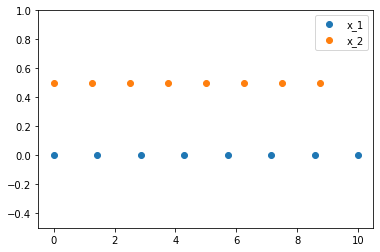

In [15]:
import matplotlib.pyplot as plt
N = 8
y = np.zeros(N)
x1 = np.linspace(0, 10, N, endpoint=True)
x2 = np.linspace(0, 10, N, endpoint=False)
plt.plot(x1, y, 'o')
plt.plot(x2, y + 0.5, 'o')
plt.ylim([-0.5, 1])
plt.legend(['x_1', 'x_2'])
plt.show()

### 5. `np.logspace`

numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)

https://numpy.org/doc/stable/reference/generated/numpy.logspace.html

`np.logspace` is similar to `np.linspace`. In this section, we compare `np.logspace` and `np.linspace`.

In [16]:
np.logspace(2, 5, num=4)

array([   100.,   1000.,  10000., 100000.])

In [17]:
np.linspace(100.0, 100000.0, num=4)

array([   100.,  33400.,  66700., 100000.])

`np.logspace(2, 5, num=4)` gives us four points $10^2, 10^3, 10^4, 10^5$ in $[10^2, 10^5]$ 

while `np.linspace(100, 1000, num=4)` gives us $100, 100+33300, 100+2\times 33300, 100+3\times 33300$. Here $33300$ is obtained from $\frac{100000-100}{3}$.

The following two cells are the same except that the results do not include endpoints.

In [18]:
np.logspace(2.0, 5.0, num=4, endpoint=False)

array([  100.        ,   562.34132519,  3162.27766017, 17782.79410039])

In [19]:
np.linspace(100.0, 100000.0, num=4, endpoint=False)

array([  100., 25075., 50050., 75025.])

The following is the case where the base of the logarithm is 2.

In [20]:
np.logspace(2.0, 8.0, num=4, base=2.0)

array([  4.,  16.,  64., 256.])

### 6. `enumerate`

It returns a tuple containing a count (from start which defaults to 0) and the values obtained from iterating over iterable.

https://docs.python.org/3/library/functions.html#enumerate

In [21]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
list(enumerate(seasons))

[(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]

In [22]:
list(enumerate(seasons, start=-9))

[(-9, 'Spring'), (-8, 'Summer'), (-7, 'Fall'), (-6, 'Winter')]

### 7. `np.meshgrids`

`numpy.meshgrid(*xi, copy=True, sparse=False, indexing='xy')`

It returns coordinate matrices from coordinate vectors.

The indexing is a bit confusing.
Giving the string ‘ij’ returns a meshgrid with matrix indexing, while ‘xy’ returns a meshgrid with Cartesian indexing. 

https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

In [23]:
x = np.linspace(-2, 2, 5)
y = np.linspace(-5, 5, 11)

In [24]:
x_1, y_1 = np.meshgrid(x, y, indexing='xy')
print(x_1.shape)
print(y_1.shape)

(11, 5)
(11, 5)


In [25]:
x_2, y_2 = np.meshgrid(x, y, indexing='ij')
print(x_2.shape)
print(y_2.shape)

(5, 11)
(5, 11)


Now we plot the contours of $y = 4x^2 + y^2$ with two methods. 

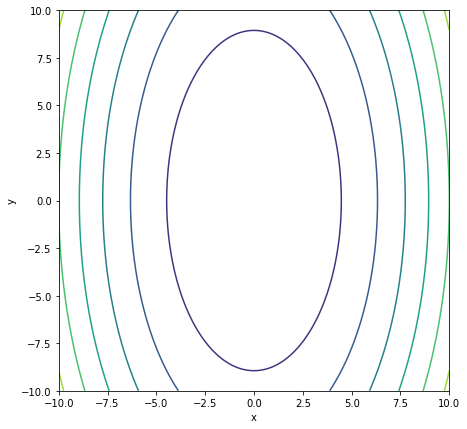

In [26]:
# Method 1

xx = np.linspace(-10, 10, 100)
yy = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(xx, yy)
Z = 4*X**2 + Y**2

fig = plt.figure(figsize=(7, 7))
plt.contour(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')  
plt.show()

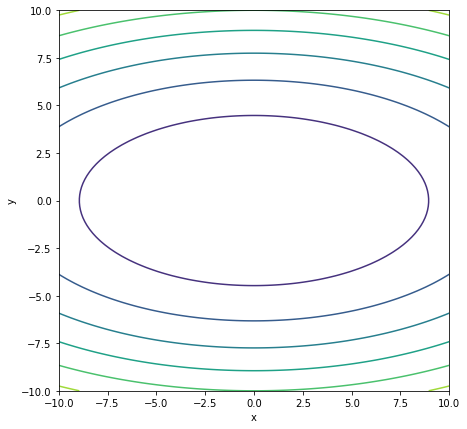

In [27]:
# Method 2

xx = np.linspace(-10, 10, 100)
yy = np.linspace(-10, 10, 100)
Z = np.zeros((len(xx), len(yy)))

for i in range(len(xx)):
    for j in range(len(yy)):
        Z[i, j] = 4*xx[i]**2 + yy[j]**2
        
plt.figure(figsize=(7, 7))
plt.contour(xx, yy, Z)
plt.xlabel('x')
plt.ylabel('y')        
plt.show()   

Method 1 and Method 2 show different result. In the result of Method 2, the roles of the x-axis and the y-axis are flipped. So when we use Method 2, we use the transpose of Z. 

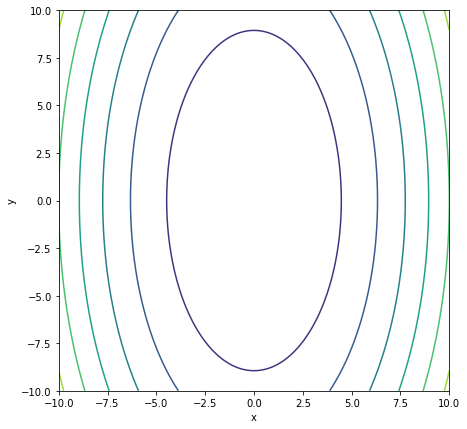

In [28]:
# Method 2 again!

xx = np.linspace(-10, 10, 100)
yy = np.linspace(-10, 10, 100)
Z = np.zeros((len(xx), len(yy)))

for i in range(len(xx)):
    for j in range(len(yy)):
        Z[i, j] = 4*xx[i]**2 + yy[j]**2
        
plt.figure(figsize=(7, 7))
plt.contour(xx, yy, Z.T)
plt.xlabel('x')
plt.ylabel('y')        
plt.show()   